# MileStone 3
# Renuka Mulay


**1) Source citation for your data set**

I am using the Wine Quality Dataset which is hosted on the UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/wine+quality

Info:The datasets are related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] 

Attribute Information:<br />

Input variables<br />
1 - fixed acidity <br />
2 - volatile acidity<br />
3 - citric acid<br />
4 - residual sugar<br />
5 - chlorides<br />
6 - free sulfur dioxide<br />
7 - total sulfur dioxide<br />
8 - density<br />
9 - pH<br />
10 - sulphates<br />
11 - alcohol<br />
Output variable (based on sensory data):<br />
12 - quality (score between 0 and 10)<br />


**2) Data read from an easily and freely accessible source**

Import statements for necessary package(s).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.cluster import KMeans
%matplotlib inline


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/renukamulay/NoteBookShare/master/data/winequality-red.csv")
data.head(5)
data.quality = pd.Categorical(data.quality)
data_original = data

**3) Number of observations and attributes**

In [3]:
shape = data.shape
print(f"Total Number of Records in the Data = {shape[0]}")
print(f"Total Number of Columns in the Data = {shape[1]}")
data.head(5)

Total Number of Records in the Data = 1599
Total Number of Columns in the Data = 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,NaN,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**4) Data types**

In [4]:
print("Data Types of the Columns are ::")
data.dtypes

Data Types of the Columns are ::


fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

**5) Distribution of numerical variables**

In [5]:
columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide'
          ,'total sulfur dioxide','total sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates'
          ,'alcohol']
data[columns].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,total sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1598.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.320213,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,46.467792,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741489,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,32.895324,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,6.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,22.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,38.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,62.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,289.000000,289.000000,1.003690,4.010000,2.000000,14.900000


**6) Distribution of categorical variables**

In [6]:
columns = ['quality']
data[columns].describe()

,quality
count,1599
unique,6
top,5
freq,681


**7) A comment on each attribute**

Below are the different attributes in the dataset.

1 - fixed acidity <br />
2 - volatile acidity<br />
3 - citric acid<br />
4 - residual sugar<br />
5 - chlorides<br />
6 - free sulfur dioxide<br />
7 - total sulfur dioxide<br />
8 - density<br />
9 - pH<br />
10 - sulphates<br />
11 - alcohol<br />
12 - quality (score between 0 and 10)<br />

**8) Removing cases with missing data** <br/>
**10) Imputing missing values**

In [7]:
# Find if there are any NAN values 
data[data.isnull().any(axis=1)]

# [Fixed acidity] has 1 rows with NAN values and replace them with the Mode of the [Fixed acidity] data.
counts = data["fixed acidity"].value_counts()
data = data.fillna({"fixed acidity": counts.index[0]})



**9) Removing outliers**

In [8]:
# Remove Outlier based on the Z Score.
# Outliers are removed based on the z score. If Z Score > 3 then the whole row is removed.
print(f"""Shape before removing the outliers {data.shape}""")
data = data[np.abs(stats.zscore(data['fixed acidity']) < 3)]
print(f"""Shape after removing the outliers {data.shape}""")

Shape before removing the outliers (1599, 12)
Shape after removing the outliers (1587, 12)


**11.Decoding  12.Consolidation 13.One-hot encoding 14. Normalization is done later on**

# **Unsupervised Learning**

**1) Perform a K-Means with sklearn using some of your attributes.**

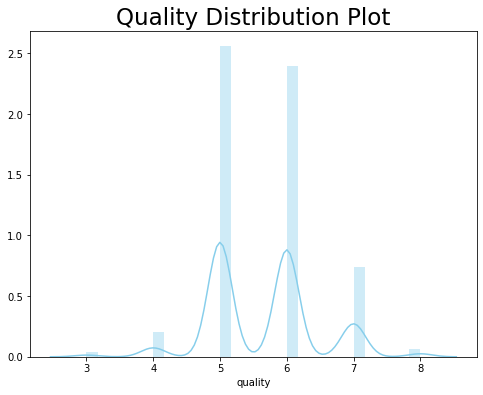

In [9]:
# create a distribution plot of quality
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Quality Distribution Plot',fontsize=23)
sns.distplot(data['quality'], color='skyblue')

**2) Normalize the attributes prior to K-Means or justify why you didn't normalize.**

In [10]:
# Normalizing over the standard deviation
data_dropped = data.drop('quality', axis=1)
X =data_dropped.values[:, 1:]
Clus_dataset = StandardScaler().fit_transform(X)

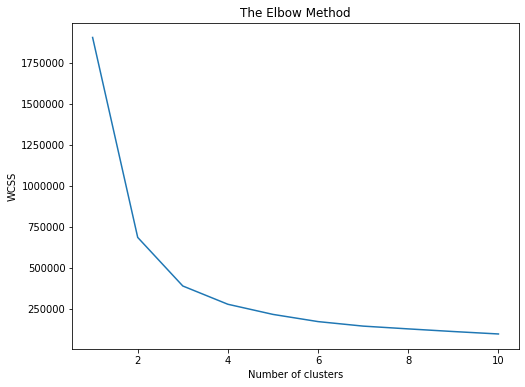

In [11]:
# number of clusters = the x-axis value of the point that is the corner of the "elbow"
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**3. Add the cluster label to the data set to be used in supervised learning**

In [12]:
# build the model with the output from elbow method which is 2
clusterNum = 2
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

# We assign the labels to each row in dataframe.
data_dropped['Clus_km'] = labels
data_dropped.head()

[0 1 0 ... 0 0 0]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Clus_km
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.2,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Text(0, 0.5, 'total sulfur dioxide')

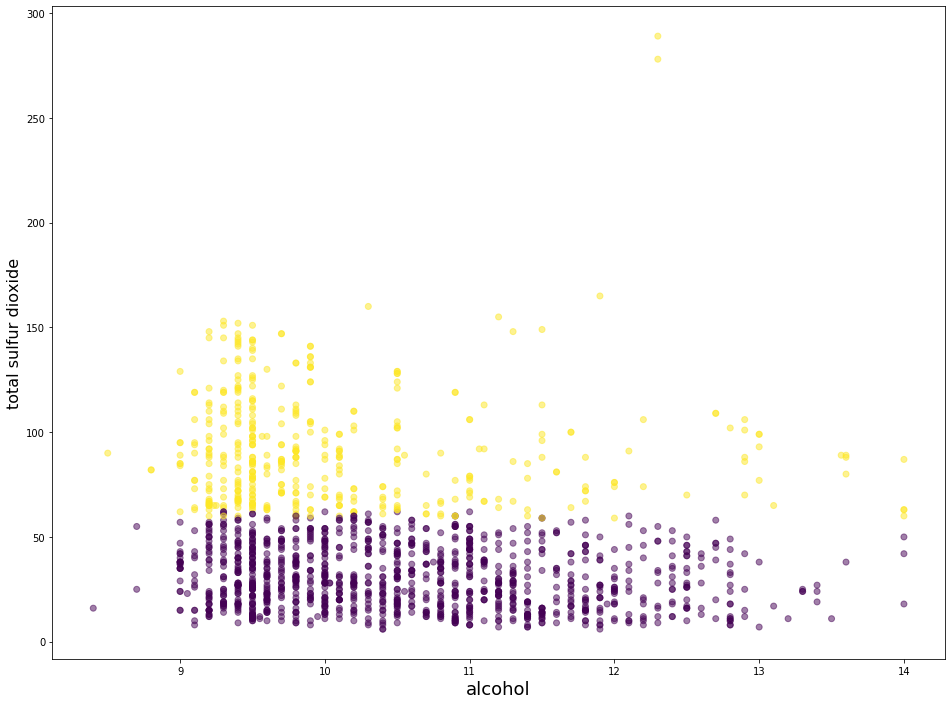

In [13]:
# create 2 dimensional graph
f3, ax = plt.subplots(figsize=(16, 12))
plt.scatter(X[:, 9], X[:, 5], c=labels.astype(np.float), alpha=.5)
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)



# **Supervised Learning**

**1) Ask a binary-choice question that describes your classification. Write the question as a comment.**

I am using the Wine data to predict the wine quality ( Good / bad ). I split the data into Traning Data and Test Data in a ratio of 80% / 20 %.

Since this is a supervised learning where I know the labels I am trying to predict, I used the Random Forest Classifier as my classifier model. I pre processed the data by Normalizing the columns since the columns like total sulfur dioxide had bigger values which will cause my model to be biased. After Normalizing I passed the training data to the classifier and it has an accuracy of 89 percent.


**Data Prep left over :: Bin the data and Encode the Data**

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.2              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.2

0    1373
1     214
Name: quality, dtype: int64

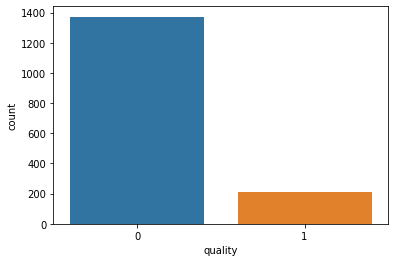

In [14]:
# DataSet doesnt have any null value in any columns
print(data.isnull().sum())

#Bin the values since we only need the 2 categories (Bad wine and good wine)
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)
print(data.head(5))

# Encode the Labels 0 being bad and 1 being good.
label_quality = LabelEncoder()
data['quality'] = label_quality.fit_transform(data['quality'])
data.head(5)

# Plot the wine quality as a Histogram.
sns.countplot(data['quality'])

# Normalization is done in the next step.
data['quality'].value_counts()

**2) Split your data set into training and testing sets using the proper function in sklearn.** <br/>
**And** <br/>
**14. Normalization the Data**

In [15]:
# Split the dataset into 80% Training Data  and 20% Test Data.
X = data.drop('quality', axis = 1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train.head(5)

# Normalize the Training Data.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**3) Use sklearn to train two classifiers on your training set** <br/>

**I am using Random Forest Classifier** <br/>

In [16]:
# Using Random Forest Classifier to predict if the wine quality is good or bad.
rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train,y_train)

pred_rfc = rfc.predict(X_test)

**4) Apply your (trained) classifiers to the test set.**

In [17]:
pred_rfc = rfc.predict(X_test)
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**5) Create and present a confusion matrix for each classifier. Specify and justify your choice of probability threshold.** 

In [18]:
print(confusion_matrix(y_test, pred_rfc))

[[266   5]
 [ 19  28]]


**6) For each classifier, create and present 2 accuracy metrics based on the confusion matrix of the classifier.**

In [19]:
matrix = confusion_matrix(y_test, pred_rfc);
accuracy_rate = (matrix[0,0] + matrix[1,1]) / (matrix[0,0] + matrix[0,1] + matrix[1,0] + matrix[1,1])
print(f"Accuracy Rate = {accuracy_rate}")

Accuracy Rate = 0.9245283018867925


In [20]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       271
           1       0.85      0.60      0.70        47

   micro avg       0.92      0.92      0.92       318
   macro avg       0.89      0.79      0.83       318
weighted avg       0.92      0.92      0.92       318



**7)For each classifier, calculate the ROC curve and it's AUC using sklearn. Present the ROC curve. Present the AUC in the ROC's plot.**

0.9598414069247075

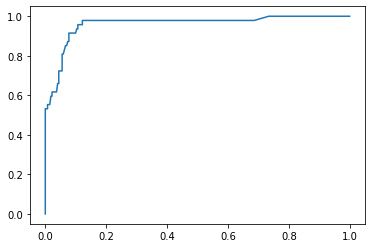

In [21]:
y_prob_test = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_test, pos_label = 1)
plt.plot(fpr, tpr)
roc_auc = auc(fpr, tpr)
roc_auc

**Using the Second Classifier as Support Vector Classification**

Print Predicted Values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       271
           1       0.88      0.32      0.47        47

   micro avg       0.89      0.89      0.89       318
   macro avg       0.89      0.66      0.70       318
weighted avg       0.89      0.89      0.87       318

 Confision Matrix 
[[269   2]
 [ 32  15]]
Accuracy Rate = 0.8930817610062893


0.9233728507497843

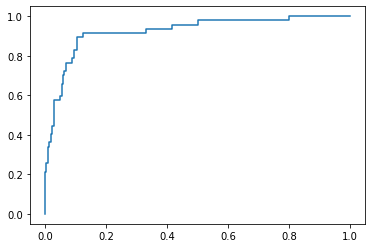

In [22]:
#Using Support Vector to predict if the wine quality is good or bad.
clf=svm.SVC(probability=True)
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

#Apply your (trained) classifiers to the test set.
pred_clf = clf.predict(X_test)
print("Print Predicted Values")
print(pred_clf[:20])

#Create and present a confusion matrix for each classifier. Specify and justify your choice of probability threshold. 
print(classification_report(y_test,pred_clf))
clf_matrix = confusion_matrix(y_test,pred_clf)
print(f" Confision Matrix ")
print(clf_matrix)

accuracy_rate_clf = (clf_matrix[0,0] + clf_matrix[1,1]) / (clf_matrix[0,0] + clf_matrix[0,1] + clf_matrix[1,0] + clf_matrix[1,1])
print(f"Accuracy Rate = {accuracy_rate_clf}")

#For each classifier, calculate the ROC curve and it's AUC using sklearn. Present the ROC curve. Present the AUC in the ROC's plot.**
y_prob_test_clf = clf.predict_proba(X_test)[:, 1]
fpr_clf, tpr_clf, threshold_clf = roc_curve(y_test, y_prob_test_clf, pos_label = 1)
plt.plot(fpr_clf, tpr_clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)
roc_auc_clf